In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get The Data

Lets get the credit card data

In [2]:
cred_df = pd.read_csv('creditcard.csv')

In [3]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Credit Card Data

We have the following dataset of transactions of a user.

1- The Time represents the time that passed since the first transaction.

2- V1-V28 are all classified data (since card transaction is sensitive information) all this data has been converted to numerical type.

3- The amount is the amount in USD.

4- Class is an indicator of whether the transition is fraud or not. If is 0 it is valid else is fraud.

In [4]:
cred_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
cred_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's see how many Null values are in the dataset.

<Axes: >

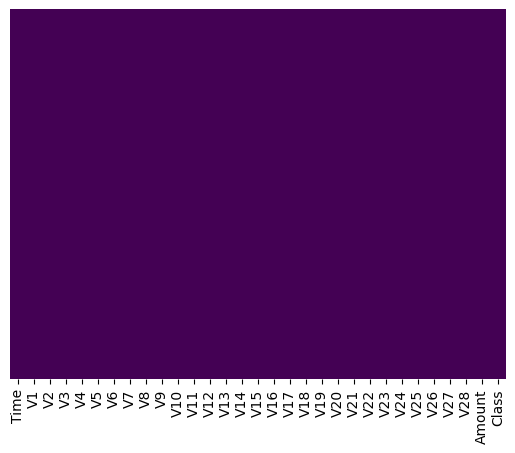

In [6]:
sns.heatmap(cred_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see there is no NULL values.

Now, lets see the number of valid and fraud transations.

Class
0    284315
1       492
Name: count, dtype: int64

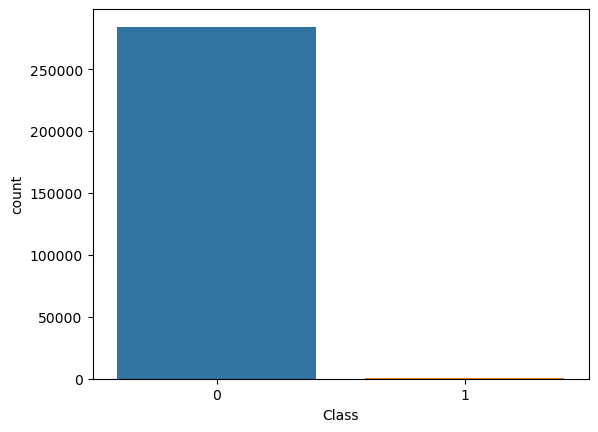

In [7]:
sns.countplot(x='Class',data=cred_df)
cred_df['Class'].value_counts()

We see that this dataset is unbalenced and requires **pre proccessing**

## Lets explore the characteristics of both classes
Lets split the data by class

In [8]:
legit = cred_df[cred_df['Class'] == 0]
fraud = cred_df[cred_df['Class'] == 1]

In [9]:
legit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [12]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Let's analyze the legit dataset's statistical values

In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Here we see that %25 of legit transactions are below 5.65 dollars %50 of transactions are below 22 dolars and %75 of transactions are below 77.05 dollars. Let's see the fraud statistical values.

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Lets compare both legit and fraud's mens side by side

In [15]:
cred_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now that we have a good idea of the data we can start with the pre processing. Lets start with undersampling.

<Axes: xlabel='Time', ylabel='Count'>

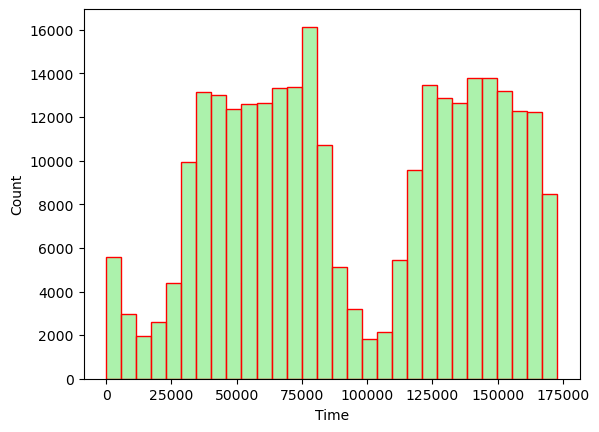

In [16]:
sns.histplot(cred_df['Time'], bins=30,color='lightgreen', edgecolor='red')

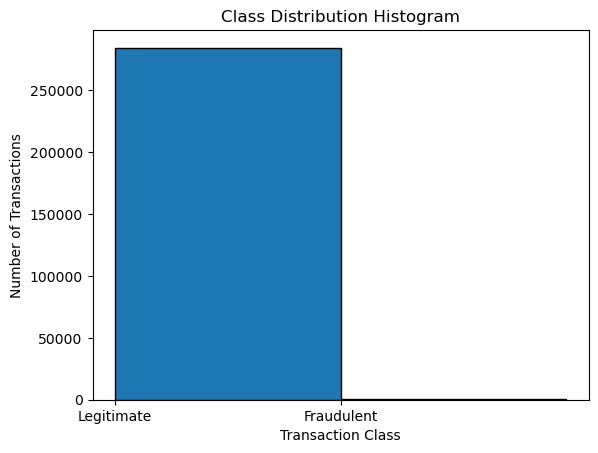

In [17]:
plt.hist(cred_df['Class'], bins=[0, 1, 2], edgecolor='black')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution Histogram')
plt.show()

## Undersampling
Undersampling involves reducing the number of instances in the majority class (the class with more samples) to balance the class distribution.
Let's start implementing it by building sample datasets. These new sets will contain a similar distribution to the original set but balanced. We will build these sets with the information above. Lets build a legit set with 492 (number of fraud values).

In [18]:
legit_sample492 = legit.sample(n  = 492)

In [19]:
legit_sample492.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,92092.254065,0.069369,-0.090183,-0.029683,0.016669,-0.027176,0.045962,-0.034087,0.024370,0.060768,...,-0.021011,-0.051126,-0.029542,0.009441,0.020359,0.021104,0.005500,0.019541,101.870996,0.0
std,47625.797956,1.876278,1.613114,1.466217,1.296492,1.217380,1.322398,0.945472,0.969574,1.117588,...,0.623562,0.682373,0.441066,0.592884,0.468593,0.474074,0.348385,0.276227,283.945508,0.0
min,742.000000,-15.213521,-14.465573,-5.503111,-3.517630,-5.469470,-2.582681,-4.867318,-10.322946,-2.823083,...,-5.576444,-1.969197,-3.723388,-2.400152,-1.378118,-1.006022,-2.575830,-1.176757,0.000000,0.0
25%,53196.250000,-0.855544,-0.703252,-1.034066,-0.774617,-0.718257,-0.764867,-0.607152,-0.196129,-0.611057,...,-0.242216,-0.580452,-0.162208,-0.321142,-0.270443,-0.305903,-0.071377,-0.049321,4.997500,0.0
50%,80439.000000,0.304419,-0.018336,0.255339,0.078797,-0.053394,-0.272759,0.021256,0.032997,0.006676,...,-0.040669,-0.043194,-0.024844,0.049456,0.054682,-0.051333,-0.002682,0.012701,24.775000,0.0
75%,136217.000000,1.317998,0.733262,1.065065,0.727135,0.618587,0.391434,0.516272,0.299161,0.708496,...,0.174263,0.470458,0.147350,0.431258,0.339954,0.243193,0.073946,0.076143,81.527500,0.0
max,172429.000000,2.329794,7.290583,2.956973,4.163132,6.313424,5.659332,4.219244,3.077262,6.231286,...,4.030111,2.177154,2.208047,1.253180,1.459583,1.548653,3.577935,3.653307,4229.510000,0.0


Now let's concat with the fraud data to make a balanced dataset.

In [20]:
new_cred_df = pd.concat([legit_sample492,fraud],axis =0)

In [21]:
new_cred_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264304,161365.0,2.113285,0.175734,-1.922065,0.285514,0.720625,-0.558748,0.204664,-0.227231,0.463392,...,-0.395146,-1.008347,0.266901,0.002240,-0.170324,0.203905,-0.060520,-0.034974,1.98,0
185811,126830.0,1.949555,-0.178081,-1.421603,0.717180,0.115758,-0.289348,-0.119766,0.021765,1.256436,...,-0.392870,-0.773951,0.142275,-0.611461,0.022864,-0.490984,0.021992,-0.036586,19.38,0
11336,19752.0,-0.788407,0.537733,1.367386,-0.193088,0.967311,-0.852955,0.337263,-0.007450,0.633277,...,-0.240658,-0.713006,0.092848,-0.114304,-0.545241,-0.155358,0.045517,0.152774,9.99,0
97802,66390.0,-0.531937,0.405899,2.195634,1.404583,-1.130889,1.426727,-0.964834,1.051891,0.718825,...,0.173753,0.897591,0.001371,0.087578,-0.328091,-0.230365,0.064389,-0.011494,28.00,0
221216,142477.0,2.066871,-1.337258,-1.846284,-1.899952,1.265556,3.662774,-1.543452,0.963491,-0.085845,...,-0.021021,-0.249294,0.390475,0.677905,-0.474113,-0.468745,0.024775,-0.039415,51.00,0
195600,131141.0,-0.378498,-4.328499,-2.264641,0.831995,-0.600228,2.217072,0.787103,0.306665,0.792637,...,0.357167,-1.460940,-0.526394,-0.917481,-1.208854,0.102527,-0.227686,0.136209,1182.74,0
120125,75718.0,-1.224520,-0.774803,0.975879,-1.443366,-0.845248,-0.785999,2.060555,-0.558161,-1.670650,...,-0.572155,-1.723131,0.974705,0.314973,-0.163031,0.456515,-0.061846,-0.033545,378.99,0
268432,163205.0,1.830226,-0.541317,-4.037843,-0.616361,3.087619,2.706242,0.620060,0.384125,-0.096984,...,0.382241,0.864808,-0.314034,0.788379,0.808033,0.127106,-0.086440,-0.065474,155.76,0
82346,59366.0,-3.627442,-3.869615,2.561082,-0.066289,2.817680,-1.229176,-2.222687,0.898667,0.630421,...,0.281690,-0.321034,0.804964,-0.274791,0.148259,0.900564,-0.164939,0.117655,123.40,0
71909,54488.0,1.162281,-0.884118,1.025398,-0.704581,-1.365076,-0.021531,-1.075705,0.151618,-0.788617,...,0.517570,1.349637,-0.120008,0.289628,0.299283,-0.058054,0.044184,0.025919,69.99,0


Class
0    492
1    492
Name: count, dtype: int64

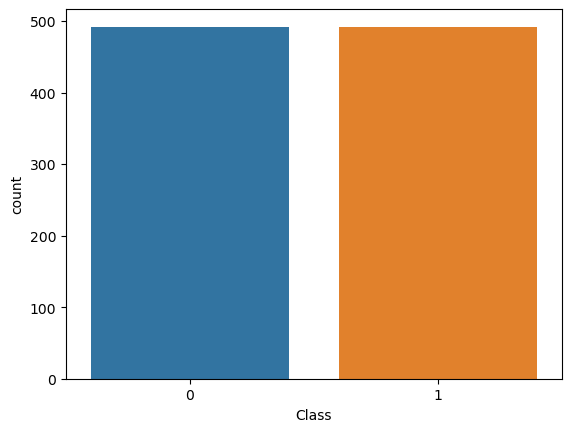

In [22]:
sns.countplot(x='Class',data=new_cred_df)
new_cred_df['Class'].value_counts()

In [23]:
cred_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
new_cred_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92092.254065,0.069369,-0.090183,-0.029683,0.016669,-0.027176,0.045962,-0.034087,0.024370,0.060768,...,0.044174,-0.021011,-0.051126,-0.029542,0.009441,0.020359,0.021104,0.005500,0.019541,101.870996
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Here we can see both our original set and our new set.

## Spilt the data to test and train
Now that our dataset is balanced. We can move on with splitting the data.

In [25]:
X = new_cred_df.drop(columns='Class',axis =1)

In [26]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264304,161365.0,2.113285,0.175734,-1.922065,0.285514,0.720625,-0.558748,0.204664,-0.227231,0.463392,...,-0.109129,-0.395146,-1.008347,0.266901,0.002240,-0.170324,0.203905,-0.060520,-0.034974,1.98
185811,126830.0,1.949555,-0.178081,-1.421603,0.717180,0.115758,-0.289348,-0.119766,0.021765,1.256436,...,-0.218087,-0.392870,-0.773951,0.142275,-0.611461,0.022864,-0.490984,0.021992,-0.036586,19.38
11336,19752.0,-0.788407,0.537733,1.367386,-0.193088,0.967311,-0.852955,0.337263,-0.007450,0.633277,...,0.008173,-0.240658,-0.713006,0.092848,-0.114304,-0.545241,-0.155358,0.045517,0.152774,9.99
97802,66390.0,-0.531937,0.405899,2.195634,1.404583,-1.130889,1.426727,-0.964834,1.051891,0.718825,...,-0.108960,0.173753,0.897591,0.001371,0.087578,-0.328091,-0.230365,0.064389,-0.011494,28.00
221216,142477.0,2.066871,-1.337258,-1.846284,-1.899952,1.265556,3.662774,-1.543452,0.963491,-0.085845,...,0.129248,-0.021021,-0.249294,0.390475,0.677905,-0.474113,-0.468745,0.024775,-0.039415,51.00


In [27]:
Y = new_cred_df['Class']

In [28]:
Y.head(5)

264304    0
185811    0
11336     0
97802     0
221216    0
Name: Class, dtype: int64

Now that we have our x and y values' lets split the data to train and test.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

## Model Selection 
In this credit card dataset where you have features (X) and a binary class label (Y) indicating whether a transaction is fraudulent (1) or not (0), we can use a variety of machine learning models to predict the class label. Mainly Logistic Regression, Decision Trees, and Random Forest. We will use Logistic Regression because Logistic regression is a simple and interpretable model often used for binary classification. It's a good choice for a baseline model.

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
Now lets predict values for the testing data.

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       128
           1       0.98      0.92      0.95       118

    accuracy                           0.96       246
   macro avg       0.96      0.95      0.96       246
weighted avg       0.96      0.96      0.96       246



## Other Resampling metdohs
We have our first resampling method. Let's try other methods and compare them. 
## OverSampling
Oversampling is a technique used in machine learning to address the imbalance in class distribution within a dataset. Class imbalance occurs when the number of instances in one class (the minority class) is significantly lower than instances in another class (the majority class). This can lead to a biased model that performs poorly on the minority class.
Oversampling involves increasing the number of instances in the minority class by generating synthetic samples or replicating existing samples. The goal is to balance the class distribution and provide the machine learning algorithm with more examples of the minority class to learn from.
There are various oversampling methods, and two common approaches are:
## Random Oversampling: 
This involves randomly duplicating instances from the minority class until the class distribution is better balanced. While this is a straightforward approach, it may lead to overfitting, as the model might memorize the duplicated samples.
## SMOTE (Synthetic Minority Over-sampling Technique): 
SMOTE is a more sophisticated technique that creates synthetic samples by interpolating between existing minority class instances. It selects a minority class instance, identifies its k-nearest neighbors, and generates synthetic instances along the line segments connecting the instance to its neighbors.

Let's try **Random Oversampling** first

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
X = cred_df.drop('Class', axis=1)  
y = cred_df['Class']

In [35]:
ros = RandomOverSampler(random_state=42)

In [36]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [37]:
random_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
random_resampled_df['Class'] = y_resampled

Class
0    284315
1    284315
Name: count, dtype: int64

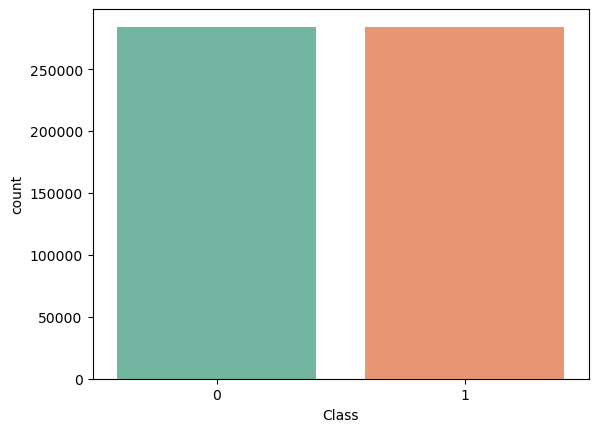

In [38]:
sns.countplot(x='Class',data=random_resampled_df,palette = "Set2")
random_resampled_df['Class'].value_counts()

In [39]:
random_resampled_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.00786,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80663.758637,-4.777378,3.632620,-7.036979,4.53839,-3.158597,-1.393472,-5.573412,0.568917,-2.580278,...,0.371674,0.717273,0.011252,-0.036044,-0.106225,0.042525,0.052134,0.174043,0.077465,121.533538


Let's try this new randomly generated dataset with logical regression to see if it's better.

In [40]:
X = random_resampled_df.drop(columns='Class',axis =1)
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [41]:
Y = random_resampled_df['Class']
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=101)

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    128169
           1       0.96      0.93      0.94    127715

    accuracy                           0.95    255884
   macro avg       0.95      0.95      0.95    255884
weighted avg       0.95      0.95      0.95    255884



Now lets try **SMOTE**

## SMOTE

**SMOTE** which stands for **Synthetic Minority Over-sampling Technique**, is a popular technique used to address the class imbalance problem in machine learning. Class imbalance occurs when one class in the target variable has significantly fewer instances than another class. This imbalance can lead to biased models that perform poorly on the minority class.



In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X = cred_df.drop('Class', axis=1)
y = cred_df['Class']

In [47]:
smote = SMOTE(random_state=101)

In [48]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [49]:
SMOTE_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
SMOTE_resampled_df['Class'] = y_resampled

Class
0    284315
1    284315
Name: count, dtype: int64

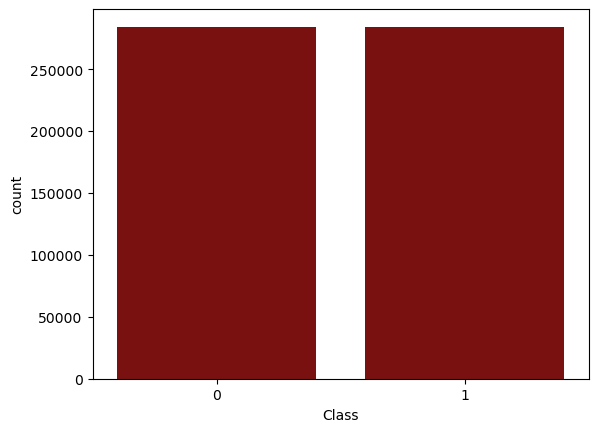

In [50]:
sns.countplot(x='Class',data=SMOTE_resampled_df,color = 'darkred')
SMOTE_resampled_df['Class'].value_counts()

In [51]:
SMOTE_resampled_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80816.915729,-4.974045,3.840840,-7.312602,4.658346,-3.272577,-1.434249,-5.874402,0.544747,-2.664831,...,0.371231,0.786468,-0.014467,-0.008931,-0.108752,0.050787,0.055901,0.160611,0.082217,103.323595


In [52]:
X = SMOTE_resampled_df.drop(columns='Class',axis =1)
X.head(5)
X.shape

(568630, 30)

In [53]:
Y = SMOTE_resampled_df['Class']
Y.head(5)
Y.shape

(568630,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.44, random_state=101)

In [58]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [59]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    125347
           1       0.97      0.95      0.96    124851

    accuracy                           0.96    250198
   macro avg       0.96      0.96      0.96    250198
weighted avg       0.96      0.96      0.96    250198



## Oversampling with ADASYN

Adaptive synthetic sampling, or ADASYN, is a variant of SMOTE. The only significant distinction between ADASYN and SMOTE is how they are comparable and derived from each other. It will favor points that are not in homogeneous neighborhoods by skewing the sample space, or the chance that any given location will be selected for duping. Let's test it. 

In [60]:
from imblearn.over_sampling import ADASYN

In [61]:
X = cred_df.drop('Class', axis=1)
y = cred_df['Class']

In [62]:
adasyn = ADASYN(random_state=101)

In [63]:
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [64]:
X_resampled.shape

(568613, 30)

In [65]:
y_resampled.shape

(568613,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=101)

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    114083
           1       0.97      0.95      0.96    113363

    accuracy                           0.96    227446
   macro avg       0.96      0.96      0.96    227446
weighted avg       0.96      0.96      0.96    227446



## Comparison

In a fraud detection system, where the goal is to identify fraudulent transactions (class 1) among legitimate ones (class 0), different evaluation metrics might be more or less critical depending on the specific requirements and priorities of the system.

**Analysis**:

The undersampling method shows good precision, recall, and F1-score for both classes, but the overall accuracy is lower compared to the other methods.

Random oversampling achieves high accuracy, with slightly higher recall for class 0 and precision for class 1.

SMOTE performs well, showing high precision, recall, and F1-score for both classes, and achieves the highest overall accuracy among the three methods.

**Conclusion:**

SMOTE appears to be the most effective method based on the provided metrics, offering a good balance of precision, recall, and accuracy.

Random oversampling also performs well, but SMOTE outperforms it in terms of precision for both classes.

Undersampling, while achieving a good balance, has a slightly lower accuracy compared to the other methods.


## Random Forest

Let start with **undersampling**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(n_estimators=100)

In [71]:
X = new_cred_df.drop(columns='Class',axis =1)

In [72]:
Y = new_cred_df['Class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rfc_pred = rfc.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,rfc_pred))

[[122   6]
 [  8 110]]


In [78]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       128
           1       0.95      0.93      0.94       118

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



Now let's make with **random oversampling**

In [79]:
X = random_resampled_df.drop(columns='Class',axis =1)

In [80]:
Y = random_resampled_df['Class']

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=101)

In [82]:
rfc.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
cmRF = confusion_matrix(Y_test,rfc_pred)

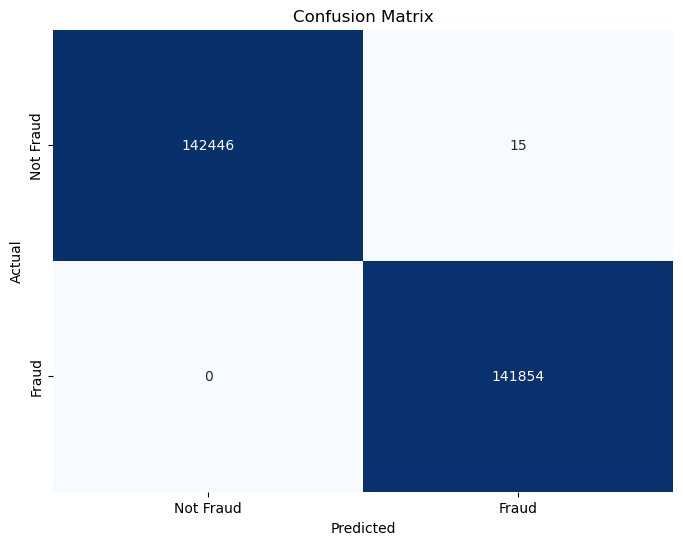

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now let's make with **Smote**

In [106]:
X = SMOTE_resampled_df.drop(columns='Class',axis =1)

In [107]:
Y = SMOTE_resampled_df['Class']

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [109]:
rfc = RandomForestClassifier(n_estimators=200)

In [110]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [111]:
rfc_pred = rfc.predict(X_test)

In [116]:
cmRF = confusion_matrix(Y_test,rfc_pred)

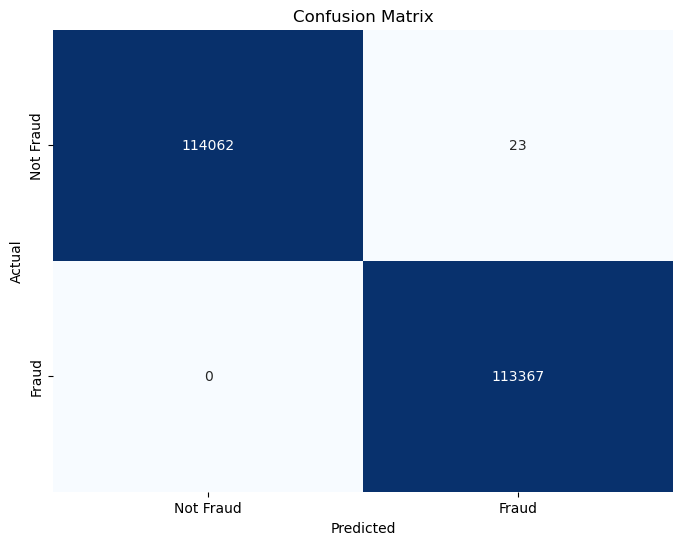

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [114]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114085
           1       1.00      1.00      1.00    113367

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452



## K-Nearst Neigbeor Model



## Deep Learning: Implementing a basic Neural Network

In this section, we will implement a basic neural network and see how it compares to sampling methods. Let's start by getting our libraries.

In [84]:
from tensorflow.keras.models import Sequential

In [85]:
from tensorflow.keras.layers import Dense

Now lets spilt our data

In [86]:
X = cred_df.drop('Class', axis=1)
y = cred_df['Class']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

From what we can see from our data analysis part our set has values above 1, because of this it would be wise the scale our data for better performance.

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.fit_transform(X_test)

In [92]:
y_test.shape

(85443,)

Now let's create our model, our model is going to have **1 input layer, 1 hidden layer, and 1 output layer**. 
We are gonna use Rectified Linear Unit(relu) in our first 2 layers and since this is a binary classification problem sigmoid is the most suitable function.
We are also using ADAM as our optimizer.

In [93]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(30,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy',)

Now lets train our model

In [94]:
model.fit(x = X_train, y= y_train, validation_data=(X_test,y_test), epochs = 100,
batch_size = 2048)

Epoch 1/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0619 - val_loss: 0.0112
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0076
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0065
Epoch 11/

98/98 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 84/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 85/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 86/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 87/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 88/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 89/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 90/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 91/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 92/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 93/100


## Model Evaluation

Now that we made our model let's see how well it is.
Let's take a closer look at our model's loss history.

In [95]:
los_df = pd.DataFrame(model.history.history)

<Axes: >

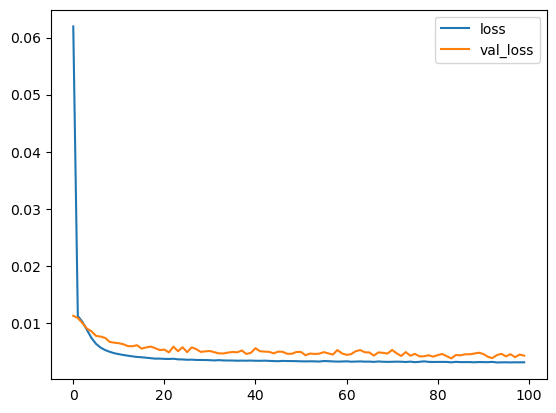

In [96]:
los_df.plot()

In [97]:
model.evaluate(X_test,y_test,verbose = 0)

0.004252659156918526

In [98]:
model.evaluate(X_train,y_train,verbose = 0)

0.003016614355146885

Now lets do our test and form our Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred > 0.5)

2671/2671 [==============================] - 1s 244us/step


In [100]:
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])

Legitimate Transactions Detected (True Negatives):  85288


In [101]:
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])

Legitimate Transactions Incorrectly Detected (False Positives):  11


In [102]:
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])

Fraudulent Transactions Missed (False Negatives):  56


In [103]:
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])

Fraudulent Transactions Detected (True Positives):  88


In [104]:
print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Total Fraudulent Transactions:  144


## Deep Learning: Neural Network with SMOTE

We implemented our neruon set even tho its good, it's not great. How can we achieve higher accuracy? Well, we know our SMOTE dataset had the best accuracy in our logistic regression model, what about we also try our neural network with our SMOTE dataset?

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
X = SMOTE_resampled_df.drop(columns='Class',axis =1)
Y = SMOTE_resampled_df['Class']

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, Y_test))

Epoch 1/10
6220/6220 [==============================] - 4s 544us/step - loss: 0.0441 - accuracy: 0.9846 - val_loss: 0.0172 - val_accuracy: 0.9945
Epoch 2/10
6220/6220 [==============================] - 3s 533us/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0093 - val_accuracy: 0.9974
Epoch 3/10
6220/6220 [==============================] - 3s 527us/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 4/10
6220/6220 [==============================] - 3s 532us/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 5/10
6220/6220 [==============================] - 3s 532us/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 6/10
6220/6220 [==============================] - 3s 524us/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0063 - val_accuracy: 0.9982
Epoch 7/10
6220/6220 [==============================] - 3s 531us/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0075 -

In [112]:
los_df = pd.DataFrame(model.history.history)

<Axes: >

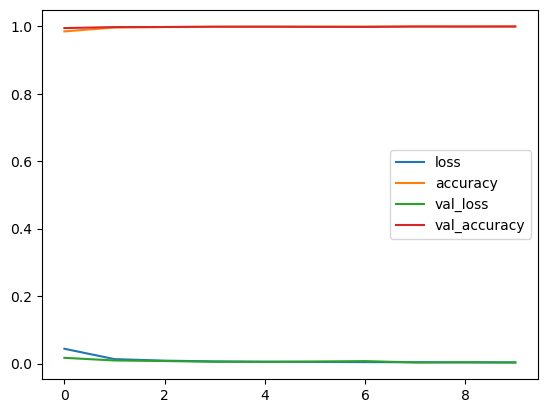

In [113]:
los_df.plot()

In [114]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%')

5331/5331 [==============================] - 2s 282us/step - loss: 0.0034 - accuracy: 0.9992
Test Loss: 0.0034, Test Accuracy: 99.92%


In [115]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(Y_test, y_pred> 0.5).astype(int)

5331/5331 [==============================] - 1s 263us/step


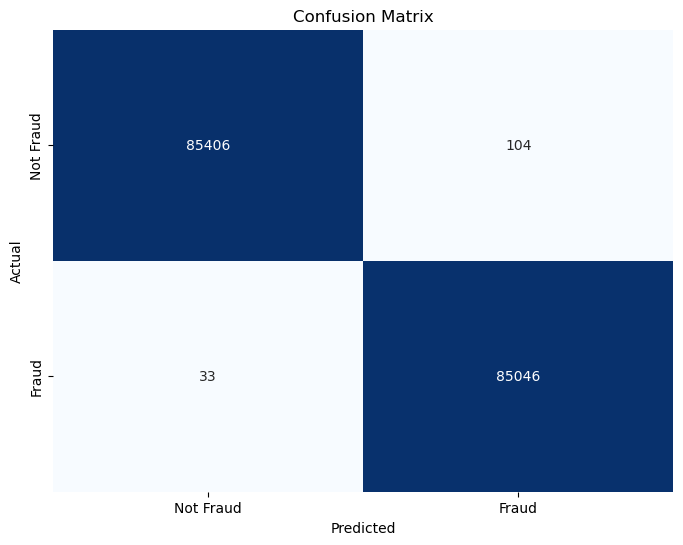

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [117]:
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])

Legitimate Transactions Detected (True Negatives):  85406


In [118]:
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])

Legitimate Transactions Incorrectly Detected (False Positives):  104


In [119]:
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])

Fraudulent Transactions Missed (False Negatives):  33


In [120]:
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])

Fraudulent Transactions Detected (True Positives):  85046


In [121]:
print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Total Fraudulent Transactions:  85079
